In [3]:
from mpl_toolkits.mplot3d import Axes3D  
from matplotlib import cm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import interpolate  
# Fixing random state for reproducibility
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']  #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False    #用来正常显示负号
%matplotlib inline

In [4]:
Source_Path='F:/Python数据可视化之美/Python数据可视化/第11章 数据可视化案例/11.4_动态数据可视化演示/'

In [5]:
from datetime import datetime
file = open(Source_Path+'ShenzhenData/Time_record.csv',encoding="utf_8_sig'", errors='ignore')
df_time=pd.read_csv(file)
file.close()
df_time['Time']=[datetime.strptime(d, '%Y/%m/%d %H:%M') for d in df_time['Time']]

df_time['Hour']=[d.strftime('%H:%M') for d in df_time['Time']]
df_time['Hour']

0     17:31
1     18:31
2     19:31
3     20:31
4     21:31
5     22:31
6     23:31
7     00:31
8     01:31
9     02:31
10    03:31
11    04:31
12    05:31
13    06:31
14    07:31
15    08:31
16    09:31
17    10:31
18    11:31
19    13:05
20    14:05
21    15:05
22    16:05
23    17:05
24    18:05
25    19:05
26    20:05
Name: Hour, dtype: object

In [6]:
file = open(Source_Path+'/Shenzhen_Point.csv',encoding="utf_8_sig'", errors='ignore')
df_grid0=pd.read_csv(file)
file.close()
df_grid0[['lat','long']]=np.round(df_grid0[['lat','long']],3)

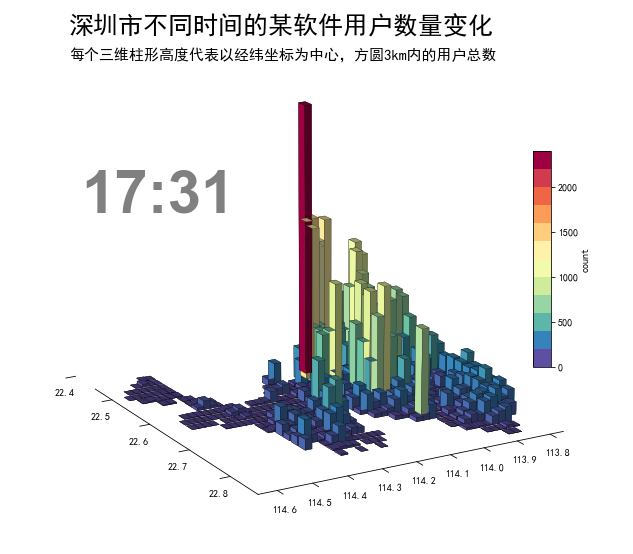

In [7]:

def draw_3dbarchart(Num_time):
    
    file = open(Source_Path+'ShenzhenData/Shenzhen'+str(Num_time)+'.csv',encoding="utf_8_sig'", errors='ignore')
    mydata=pd.read_csv(file)
    file.close()
    
    mydata['group']=mydata.transform(lambda x: "("+ str(x['long'])+"," + str(x['lat'])+")",axis=1) 
    mydata['num']=1
    df_Map=mydata.groupby('group',as_index=False).agg({'num': np.sum,'lat': np.mean, 'long': np.mean})
    df_Map[['lat','long']]=np.round(df_Map[['lat','long']],3)
    
    df_grid=pd.merge(df_grid0,df_Map,how='left',on=['lat','long'])
    df_grid.fillna(0, inplace=True)
    
    dz_min=df_grid.num.min()
    dz_max=2500#df_grid.Count.max()
    #df_grid
    ax.clear()
    plt.cla() 
    #ax = fig.add_subplot(111, projection='3d')
    #ax = fig.gca(projection='3d')
    ax.view_init(azim=60, elev=20)##改变绘制图像的视角,即相机的位置,azim沿着z轴旋转，elev沿着y轴
    ax.grid(False)
    ax.margins(0)
    ax.xaxis._axinfo['tick']['outward_factor'] = 0
    ax.xaxis._axinfo['tick']['inward_factor'] = 0.4
    ax.yaxis._axinfo['tick']['outward_factor'] = 0
    ax.yaxis._axinfo['tick']['inward_factor'] = 0.4
    #ax.zaxis._axinfo['tick']['outward_factor'] = 0
    #ax.zaxis._axinfo['tick']['inward_factor'] = 0.4
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    ax.xaxis.pane.set_edgecolor('none')
    ax.yaxis.pane.set_edgecolor('none')
    ax.zaxis.pane.set_edgecolor('none')
    ax.yaxis.set_ticks(np.arange(22.4,22.8,0.1))
    ax.zaxis.line.set_visible(False)
    ax.set_zticklabels([])
    ax.set_zticks([])
  
    dz=df_grid.num.values
    colors = cm.Spectral_r(dz / float(dz_max))

    ax.bar3d(df_grid.long.values, df_grid.lat.values, 0, 0.02, 0.015, dz, zsort='average',color=colors,
         alpha=1,edgecolor='k',linewidth=0.2)

    plt.text(0.1,0.95, s='深圳市不同时间的某软件用户数量变化', transform=ax.transAxes, size=25, color='k')
    plt.text(0.1,0.9, s='每个三维柱形高度代表以经纬坐标为中心，方圆3km内的用户总数', transform=ax.transAxes, size=15,weight='light', color='k')
    plt.text(0.12,0.62, s=df_time['Hour'][Num_time-1], transform=ax.transAxes, size=60, color='gray',weight='bold',family='Arial')
    cmap = mpl.cm.Spectral_r
    norm = mpl.colors.Normalize(vmin=0, vmax=1)
    bounds = np.arange(dz_min,dz_max,200)
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    cb2 = mpl.colorbar.ColorbarBase(ax2, cmap=cmap,norm=norm,boundaries=bounds,
    ticks=np.arange(dz_min,dz_max,500),spacing='proportional',label='count')
    #fig.savefig('三维统计直方图.pdf')
    #plt.show()


#fig, (ax, ax2) = plt.subplots(figsize=(10, 10), ncols=2)
#fig, ax = plt.subplots(1,1,figsize=(10, 10))#,projection='3d'
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
ax2 = fig.add_axes([0.85, 0.35, 0.025, 0.3])
plt.subplots_adjust(left=0.12, right=0.98, top=0.85, bottom=0.1)   
#fig.tight_layout(pad=0)
#ax.set_visible(True)
draw_3dbarchart(1)

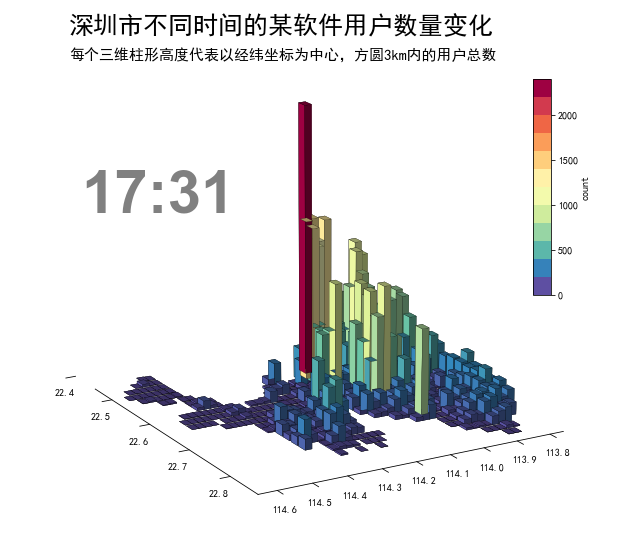

In [8]:
import matplotlib.animation as animation
from IPython.display import HTML
#fig, ax = plt.subplots(figsize=(10, 10))#,projection='3d'
#fig= plt.figure(figsize=(10, 10))#,projection='3d'
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
ax2= fig.add_axes([0.85, 0.35, 0.025, 0.3])
#fig= plt.figure(figsize=(10, 10))
plt.subplots_adjust(left=0.12, right=0.98, top=0.75, bottom=0)   
animator = animation.FuncAnimation(fig, draw_3dbarchart, frames=np.arange(1,27,1),interval=200)
HTML(animator.to_jshtml()) 
# or use animator.to_html5_video() or animator.save()